In [13]:
import utils.mnist_reader as mnist_reader
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA

seed = 0
np.random.seed(seed) 

Load Fashin-MNIST dataset

In [14]:
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

Similar to the MNIST we have worked on, let's first visualize few images in the Fashin-MNIST dataset.

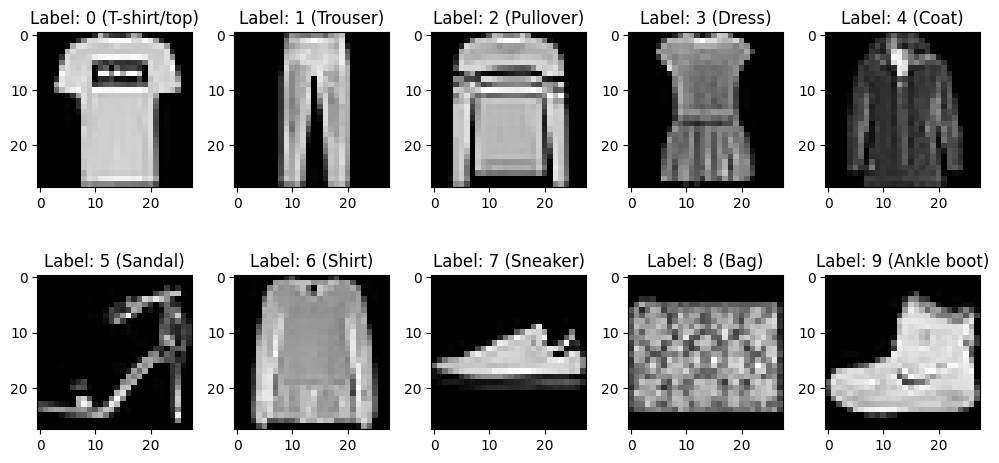

In [15]:
fig, ax = plt.subplots(2, 5, figsize=(10, 5))

label2desc = {0: 'T-shirt/top',
              1: 'Trouser',
              2: 'Pullover',
              3: 'Dress',
              4: 'Coat',
              5: 'Sandal',
              6: 'Shirt',
              7: 'Sneaker',
              8: 'Bag',
              9: 'Ankle boot'}

img_num = 0
idx = 0
for i in range(2):
    for j in range(5):
        img = X_train[y_train==img_num][0].reshape(28, 28)
        ax[i, j].imshow(img, cmap='gray')
        label = y_train[img_num]
        ax[i, j].set_title(f'Label: {img_num} ({label2desc[img_num]})')

        img_num += 1


plt.tight_layout()

Now we know what the graph supposed to look like. Let's then create a barchart to represent them so we have a better understand of the distribution

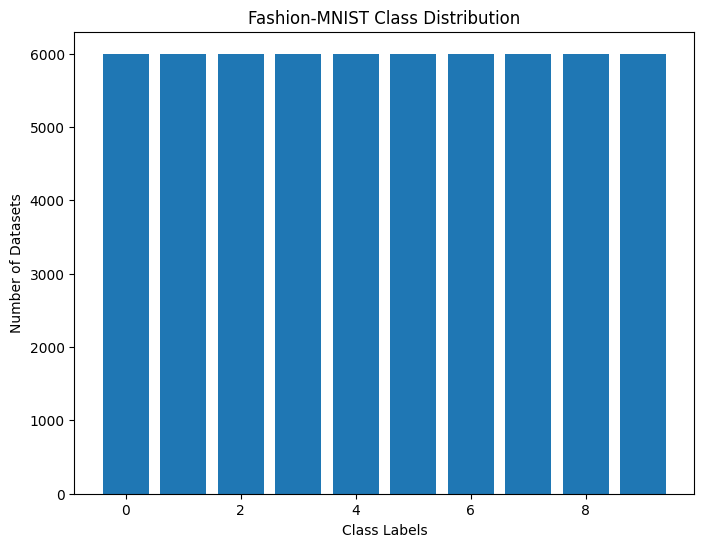

In [16]:
labels = np.unique(y_train)

data_per_class = []
for label in np.unique(y_train):
    data_per_class.append(np.sum(y_train == label))

# Plot a bar chart of the class distribution
plt.figure(figsize=(8, 6))
plt.bar(labels, data_per_class)
plt.xlabel('Class Labels')
plt.ylabel('Number of Datasets')
plt.title('Fashion-MNIST Class Distribution')
plt.show()



We could see that each class label of the training dataset has 6000 datapoints.

Now, we want to know exactly how the features scattered according to their labels. Due to the high-dimensionality of the datasets, we need to apply Principal Component Analysis (PCA) on the Fashin-MNIST to a lower dimensions and display the scatter plot.

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# use PCA to reduce dimensions
pca = PCA(n_components=2)
X_rd = pca.fit_transform(X_train)
print(X_rd.shape)

ax.set_title('2D View of Fashion-MNIST Features')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

for c in np.unique(y_train):
    ax.scatter(X_rd[:, 0][y_train == c], X_rd[:, 1][y_train == c], alpha=0.4, s=3, label=c)
    ax.legend()

